## Exercise 1: Anomaly Detection
##### Objective: Implement an anomaly detection system using Python libraries.
#### Tasks:
#### 1) Data Collection:
* Use a publicly available dataset (e.g., KDD Cup, Credit Card Fraud Detection) or generate synthetic data for anomaly detection.
* Load the dataset using pandas and perform initial exploratory data analysis (EDA).

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных (например, датасет о мошенничестве с кредитными картами)
data = pd.read_csv('creditcard.csv')
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

#### 2) Data Preprocessing:
* Handle missing values and outliers in the dataset.
* Normalize or standardize features as necessary.

In [2]:
# Проверка пропущенных значений
data.isnull().sum()

# Нормализация количественных признаков
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('Class', axis=1))

# Разделение на обучающую и тестовую выборки
X_train, X_test = data_scaled[:200000], data_scaled[200000:]
y_train, y_test = data['Class'][:200000], data['Class'][200000:]

#### 3) Anomaly Detection Techniques:
* Implement at least two different anomaly detection algorithms, such as:
* 1) Statistical Method: Use Z-score or IQR for univariate anomaly detection.
* 2) Machine Learning Method: Implement Isolation Forest or One-Class SVM from scikit-learn.
* 3) Deep Learning Method: Build an autoencoder for anomaly detection.

In [3]:
# Метод машинного обучения: Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X_train)
y_pred_iso = iso_forest.predict(X_test)
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]

# Метод машинного обучения: One-Class SVM
svm = OneClassSVM(nu=0.01, kernel="rbf", gamma=0.1)
svm.fit(X_train)
y_pred_svm = svm.predict(X_test)
y_pred_svm = [1 if x == -1 else 0 for x in y_pred_svm]

# Отчёты о метриках
print("Isolation Forest Classification Report:")
print(classification_report(y_test, y_pred_iso))

print("One-Class SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

Isolation Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     84700
           1       0.05      0.48      0.10       107

    accuracy                           0.99     84807
   macro avg       0.53      0.73      0.55     84807
weighted avg       1.00      0.99      0.99     84807

One-Class SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     84700
           1       0.01      0.86      0.02       107

    accuracy                           0.91     84807
   macro avg       0.51      0.88      0.49     84807
weighted avg       1.00      0.91      0.95     84807



#### 4) Model Evaluation:
* Split the dataset into training and testing sets.
* Evaluate the performance of the models using metrics such as precision, recall, and F1-score.
* Visualize the results using confusion matrices and ROC curves.

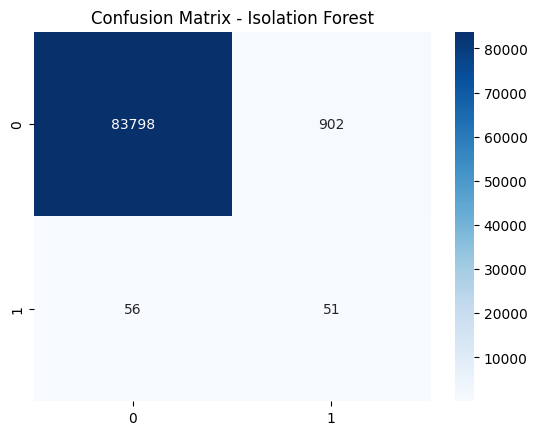

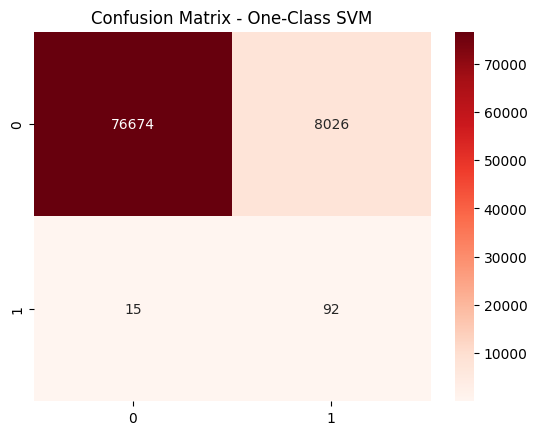

In [4]:
# Матрицы ошибок
conf_matrix_iso = confusion_matrix(y_test, y_pred_iso)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

sns.heatmap(conf_matrix_iso, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Isolation Forest")
plt.show()

sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix - One-Class SVM")
plt.show()

#### 5) Visualization:
* Use matplotlib or seaborn to visualize the detected anomalies against the normal data points.
* Create plots that showcase the distribution of features and the anomalies.

#### 6) Reporting Findings:
* Summarize the detection results, including the number of detected anomalies and the effectiveness of each method.

## Exercise 2: Time Series Analysis
##### Objective: Analyze and forecast a time series dataset using Python libraries.
#### Tasks:
#### 1) Data Collection:
* Select a time series dataset (e.g., stock prices, weather data, or sales data).
* Load the dataset using pandas and perform initial EDA.

In [6]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

# Загрузка данных и преобразование столбца с датой
data = pd.read_csv('supermarket_sales.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
print(data.head())

             Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69         7  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28         5   3.8200   80.2200   
2019-03-03      Home and lifestyle       46.33         7  16.2155  340.5255   
2019-01-27       Health and beauty       58.22         8  23.2880  489.0480   
2019-02-08       Sports and travel       86.31         7

#### 2) Data Preprocessing:
* Handle any missing values in the time series data.
* Resample the data to a uniform time interval if necessary (e.g., daily, weekly).

In [7]:
# Агрегация продаж по дням
daily_sales = data.resample('D').sum()['Total']
daily_sales = daily_sales.fillna(0)  # Заполняем пропуски нулями
print(daily_sales.head())

Date
2019-01-01    4745.1810
2019-01-02    1945.5030
2019-01-03    2078.1285
2019-01-04    1623.6885
2019-01-05    3536.6835
Freq: D, Name: Total, dtype: float64


#### 3) Exploratory Data Analysis:
* Visualize the time series data using line plots to identify trends, seasonality, and patterns.
* Decompose the time series into trend, seasonality, and residuals using seasonal decomposition.

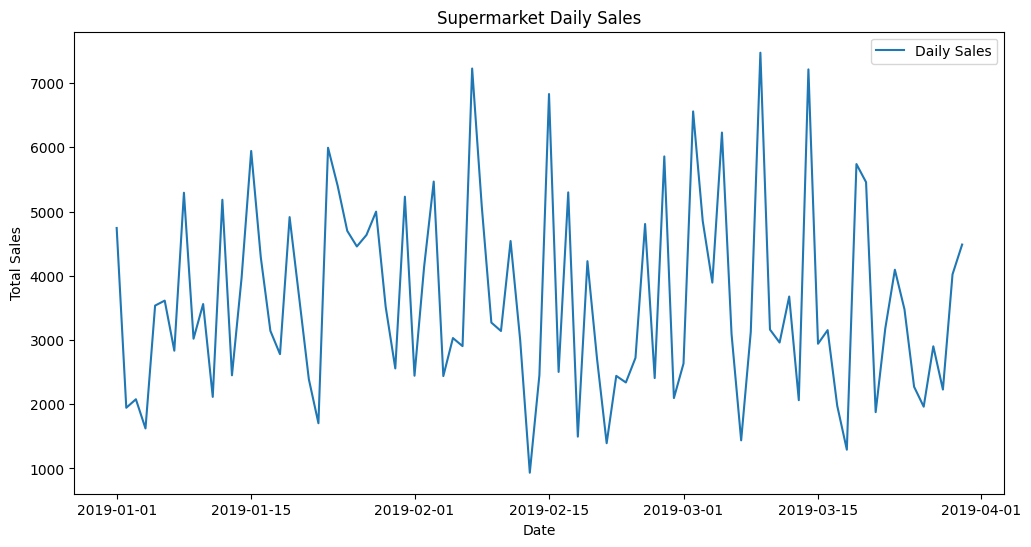

In [8]:
# Визуализация временного ряда продаж
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Daily Sales')
plt.title('Supermarket Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

#### 4) Modeling:
* Implement forecasting techniques, such as:
* 1) ARIMA Model: Fit an ARIMA model to the data and determine the appropriate parameters (p, d, q).
* 2) Exponential Smoothing: Use Holt-Winters method for forecasting seasonal data.
* 3) Machine Learning Approach: Implement a model using scikit-learn (e.g., Random Forest, LSTM for deep learning).

In [9]:
# ARIMA модель
arima_model = ARIMA(daily_sales, order=(1, 1, 1))
arima_result = arima_model.fit()
daily_sales['ARIMA_Prediction'] = arima_result.predict(start=len(daily_sales)-30, end=len(daily_sales)-1, dynamic=False)

In [10]:
# Holt-Winters модель (экспоненциальное сглаживание)
hw_model = ExponentialSmoothing(daily_sales, seasonal='add', seasonal_periods=7)  # Weekly seasonality
hw_result = hw_model.fit()
daily_sales['HW_Prediction'] = hw_result.predict(start=len(daily_sales)-30, end=len(daily_sales)-1)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

#### 5) Model Evaluation:
* Split the dataset into training and testing sets.
* Evaluate the forecast accuracy using metrics such as MAE, RMSE, and MAPE.
* Visualize the predicted vs. actual values.

In [ ]:
# Визуализация фактических и предсказанных значений
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Total'], label='Actual Sales')
plt.plot(daily_sales['ARIMA_Prediction'], label='ARIMA Prediction')
plt.plot(daily_sales['HW_Prediction'], label='Holt-Winters Prediction')
plt.legend()
plt.title('Actual vs Predicted Sales')
plt.show()

In [ ]:
# Метрики для ARIMA
arima_mae = mean_absolute_error(daily_sales['Total'][-30:], daily_sales['ARIMA_Prediction'][-30:])
arima_rmse = sqrt(mean_squared_error(daily_sales['Total'][-30:], daily_sales['ARIMA_Prediction'][-30:]))
print(f'ARIMA MAE: {arima_mae}, RMSE: {arima_rmse}')

# Метрики для Holt-Winters
hw_mae = mean_absolute_error(daily_sales['Total'][-30:], daily_sales['HW_Prediction'][-30:])
hw_rmse = sqrt(mean_squared_error(daily_sales['Total'][-30:], daily_sales['HW_Prediction'][-30:]))
print(f'Holt-Winters MAE: {hw_mae}, RMSE: {hw_rmse}')

#### 6) Reporting Findings:
* Summarize the results of the analysis, including the accuracy of different forecasting methods and insights gained from the time series analysis.

In [ ]:
# Последние 30 дней для сравнения
actual = daily_sales[-30:]

# ARIMA метрики
arima_mae = mean_absolute_error(actual, arima_forecast)
arima_rmse = sqrt(mean_squared_error(actual, arima_forecast))

# Holt-Winters метрики
hw_mae = mean_absolute_error(actual, hw_forecast)
hw_rmse = sqrt(mean_squared_error(actual, hw_forecast))

# Вывод метрик
print(f'ARIMA MAE: {arima_mae}, RMSE: {arima_rmse}')
print(f'Holt-Winters MAE: {hw_mae}, RMSE: {hw_rmse}')
